
Simple Linear Regression Results:
  Mean Squared Error (MSE): 1.29
  Root Mean Squared Error (RMSE): 1.14
  R² Score: 0.01

Multiple Linear Regression Results:
  Mean Squared Error (MSE): 0.56
  Root Mean Squared Error (RMSE): 0.75
  R² Score: 0.58


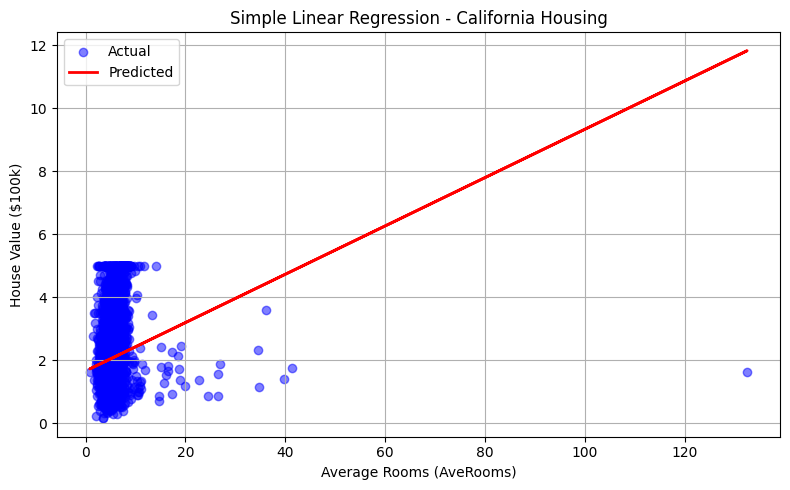

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the California Housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Target')

# 2. Handle missing values (if any)
X.fillna(X.mean(), inplace=True)

# 3. Feature scaling (standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ========== SIMPLE LINEAR REGRESSION ==========
# Use a single feature (e.g., 'AveRooms') for simple linear regression
X_simple = X[['AveRooms']]
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y, test_size=0.2, random_state=42)

simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)
y_pred_simple = simple_model.predict(X_test_simple)

# ========== MULTIPLE LINEAR REGRESSION ==========
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)
y_pred_multi = multi_model.predict(X_test_multi)

# ========== EVALUATION FUNCTION ==========
def evaluate_model(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Results:")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"  R² Score: {r2:.2f}")

evaluate_model(y_test_simple, y_pred_simple, "Simple Linear Regression")
evaluate_model(y_test_multi, y_pred_multi, "Multiple Linear Regression")

# ========== VISUALIZATION ==========
# Plot for Simple Linear Regression
plt.figure(figsize=(8, 5))
plt.scatter(X_test_simple, y_test_simple, color='blue', alpha=0.5, label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Predicted')
plt.xlabel('Average Rooms (AveRooms)')
plt.ylabel('House Value ($100k)')
plt.title('Simple Linear Regression - California Housing')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Regression: Complete Explanation

## 1. What is Regression?

Regression is a **supervised machine learning** technique used to **predict continuous values** (like prices, salary, age). It finds the relationship between **independent variables (X)** and a **dependent variable (Y)**.

---

## 2. Types of Regression

| Type                     | Description                                 |
|--------------------------|---------------------------------------------|
| Simple Linear Regression | One input (X) and one output (Y)            |
| Multiple Linear Regression | Multiple inputs (X₁, X₂, ...) for one Y     |
| Polynomial Regression     | X raised to powers (non-linear model)       |
| Ridge/Lasso/ElasticNet   | Regularized versions of linear regression |

---

## 3. Simple Linear Regression

### Equation:
y = mx + c

yaml
Copy
Edit
- `m`: slope (coefficient)
- `c`: intercept
- `x`: input feature
- `y`: predicted output

### Goal:
Minimize the **difference between actual (y) and predicted (ŷ) values**.

---

## 4. Cost Function (MSE)

### Mean Squared Error (MSE):
MSE = (1/n) * Σ(yᵢ - ŷᵢ)²

yaml
Copy
Edit
- `yᵢ`: actual value
- `ŷᵢ`: predicted value
- `n`: total samples

The model tries to **minimize** this MSE.

---

## 5. Gradient Descent (For Learning Coefficients)

Gradient descent helps **find the best values of `m` and `c`** by minimizing MSE.

Update formula:
m = m - α * (∂MSE/∂m)
c = c - α * (∂MSE/∂c)

yaml
Copy
Edit
- `α`: learning rate

---

## 6. Multiple Linear Regression

### Equation:
y = w₁x₁ + w₂x₂ + ... + wₙxₙ + b

markdown
Copy
Edit
- `x₁, x₂, ..., xₙ`: input features
- `w₁, w₂, ..., wₙ`: weights (coefficients)
- `b`: bias (intercept)

### Matrix Form:
y = Xw + b

yaml
Copy
Edit

---

## 7. Evaluation Metrics

| Metric     | Formula                                                              | Use                        |
|------------|----------------------------------------------------------------------|----------------------------|
| **MSE**    | (1/n) * Σ(y - ŷ)²                                                    | Penalizes large errors     |
| **RMSE**   | √MSE                                                                  | Same units as output       |
| **R² Score** | 1 - (SSres / SStot)                                                 | % of variance explained    |

- R² = 1 → perfect prediction
- R² = 0 → model predicts just the mean

---

## 8. Assumptions in Linear Regression

1. **Linearity**: Y is linearly dependent on X.
2. **Independence**: Observations are independent.
3. **Homoscedasticity**: Constant variance of errors.
4. **Normality**: Residuals are normally distributed.
5. **No Multicollinearity**: For multiple regression, input features should not be highly correlated.

---

## 9. Example (Simple Linear Regression)

Let’s say we predict house prices based on income:

- Equation: `Price = 0.5 * Income + 2.0`
- If Income = 8 → Predicted Price = 0.5×8 + 2 = 6.0

---

## 10. Viva-Ready Short Answers

### Q1. What is regression?
1. Regression is a supervised ML technique.
2. It predicts continuous output based on input features.

**Keywords**: regression, supervised, continuous, prediction

---

### Q2. Difference between Simple and Multiple Linear Regression?
1. Simple regression uses one input variable.
2. Multiple regression uses more than one input variable.

**Keywords**: one variable, multiple variables

---

### Q3. What is the regression equation?
1. Simple: `y = mx + c`
2. Multiple: `y = w₁x₁ + w₂x₂ + ... + wₙxₙ + b`

**Keywords**: slope, intercept, weights

---

### Q4. What is R² score?
1. It shows how well the model fits the data.
2. R² = 1 means perfect prediction.

**Keywords**: variance explained, goodness of fit

---

### Q5. What is the cost function in regression?
1. It is MSE – mean squared error.
2. It calculates the average squared difference between actual and predicted values.

**Keywords**: MSE, error, minimize

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

🔹 Simple Linear Regression:
MSE: 4061.83
RMSE: 63.73
R² Score: 0.23


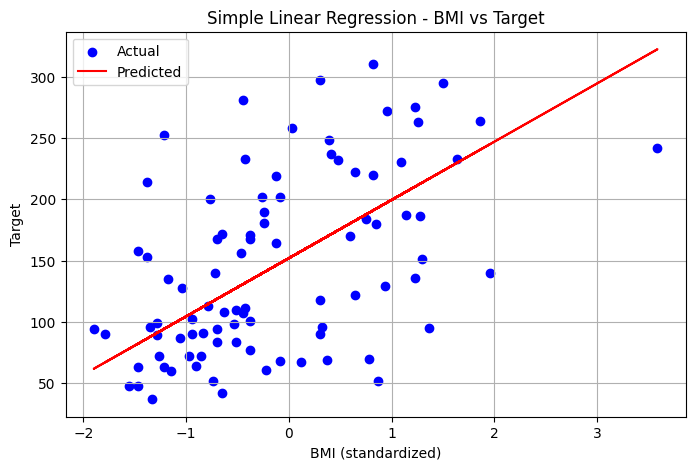


🔹 Multiple Linear Regression:
MSE: 2900.19
RMSE: 53.85
R² Score: 0.45


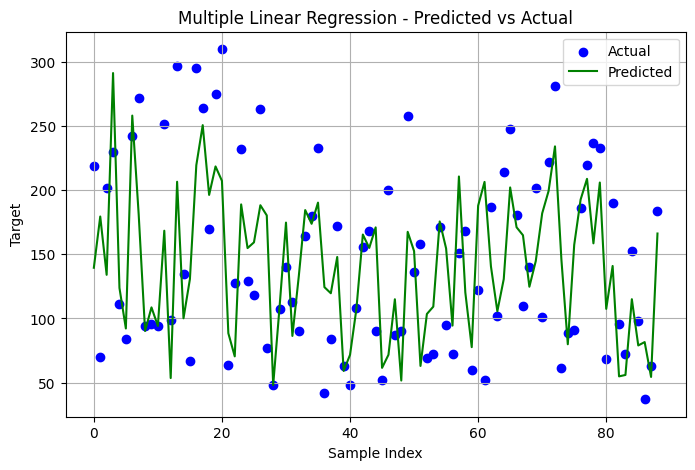

In [2]:
# 📦 Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 📌 Load dataset
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# 📊 Show first few rows
print(X.head())

# 🧼 a. Data Preprocessing
# Check for missing values
print(X.isnull().sum())  # Should be 0
# Feature Scaling
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 📉 b. Simple Linear Regression (using one feature, e.g., 'bmi')
X_bmi = X_scaled[["bmi"]]  # Use only 'bmi' for simple linear regression
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

simple_model = LinearRegression()
simple_model.fit(X_train, y_train)
y_pred_simple = simple_model.predict(X_test)

# 📏 Evaluation - Simple Model
mse_simple = mean_squared_error(y_test, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("\n🔹 Simple Linear Regression:")
print(f"MSE: {mse_simple:.2f}")
print(f"RMSE: {rmse_simple:.2f}")
print(f"R² Score: {r2_simple:.2f}")

# 📈 Visualization - Simple Model
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_simple, color='red', label='Predicted')
plt.xlabel('BMI (standardized)')
plt.ylabel('Target')
plt.title('Simple Linear Regression - BMI vs Target')
plt.legend()
plt.grid(True)
plt.show()

# 🧮 c. Multiple Linear Regression (all features)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)
y_pred_multi = multi_model.predict(X_test)

# 📏 Evaluation - Multiple Model
mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print("\n🔹 Multiple Linear Regression:")
print(f"MSE: {mse_multi:.2f}")
print(f"RMSE: {rmse_multi:.2f}")
print(f"R² Score: {r2_multi:.2f}")

# 📈 Visualization - Multiple Model Predictions
plt.figure(figsize=(8, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.plot(range(len(y_pred_multi)), y_pred_multi, color='green', label='Predicted')
plt.title('Multiple Linear Regression - Predicted vs Actual')
plt.xlabel('Sample Index')
plt.ylabel('Target')
plt.legend()
plt.grid(True)
plt.show()


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Slope (m): 9.999999999999998
Intercept (c): 7.105427357601002e-15
Coefficients (slopes): [ 0.72913845 -0.64601244  1.44679341]
Intercept: -0.2627111975741818

Evaluation Metrics:
Mean Absolute Error (MAE): 0.24
Mean Squared Error (MSE): 0.10
Root Mean Squared Error (RMSE): 0.31
R-squared (R²): 0.97


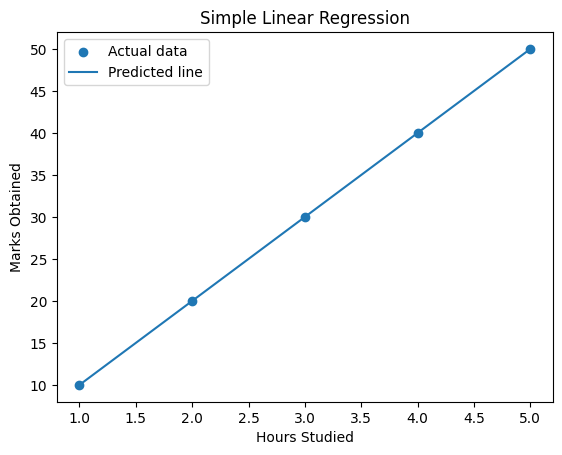

In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np


from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()

# Create a DataFrame from the Iris data
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the species column (target) to the DataFrame
df['species'] = iris.target

# Map numerical species values to actual species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Print the first 5 rows of the dataset
print(df.head())




# Simple data
# x = hours studied, y = marks obtained
x = np.array([[1], [2], [3], [4], [5]])
y = np.array([10, 20, 30, 40, 50])

# Create and train the model
model = LinearRegression()
model.fit(x, y)

# Predict
y_pred = model.predict(x)

# Print model parameters
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

plt.scatter(x, y, label='Actual data')
plt.plot(x, y_pred , label='Predicted line')
plt.xlabel("Hours Studied")
plt.ylabel("Marks Obtained")
plt.title("Simple Linear Regression")
plt.legend()





#### MLR iris
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load Iris dataset
iris = load_iris()

# X is all features except petal length (the target we want to predict)
X = np.delete(iris.data, 2, axis=1)  # Remove petal length (index 2) from features

# y is the petal length (target variable)
y = iris.data[:, 2]

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the petal length using the model
y_pred = model.predict(X)

# Print the model parameters (slope and intercept)
print("Coefficients (slopes):", model.coef_)
print("Intercept:", model.intercept_)

# # Show some predictions vs actual values
# for i in range(5):
#     print(f"Actual: {y[i]:.2f}, Predicted: {y_pred[i]:.2f}")

# Evaluate the model
mae = mean_absolute_error(y, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y, y_pred)   # Mean Squared Error
rmse = np.sqrt(mse)                   # Root Mean Squared Error
r2 = r2_score(y, y_pred)              # R-squared (Coefficient of Determination)

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


In [ ]:
y_pred

array([10., 20., 30., 40., 50.])

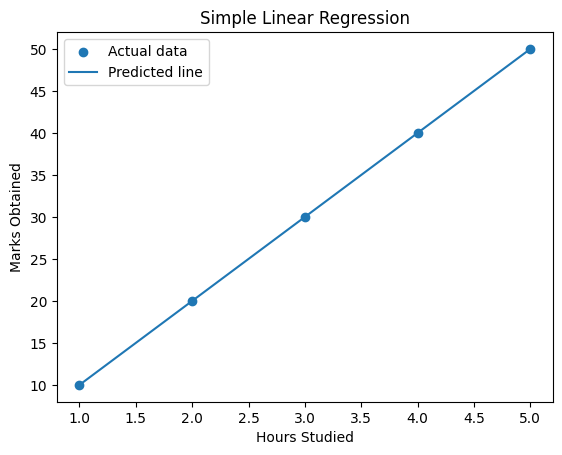

Coefficients (slopes): [ 0.72913845 -0.64601244  1.44679341]
Intercept: -0.2627111975741818
Actual: 1.40, Predicted: 1.48
Actual: 1.40, Predicted: 1.66
Actual: 1.30, Predicted: 1.39
Actual: 1.50, Predicted: 1.38
Actual: 1.40, Predicted: 1.35


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert it into a pandas DataFrame for easy exploration
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# # Add the target variable to the DataFrame (species)
# df['species'] = iris.target

# Display the first few rows of the dataset
print(df.head())


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()

# Create a DataFrame from the Iris data
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the species column (target) to the DataFrame
df['species'] = iris.target

# Map numerical species values to actual species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Print the first 5 rows of the dataset
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load Iris dataset
iris = load_iris()

# X is all features except petal length (the target we want to predict)
X = np.delete(iris.data, 2, axis=1)  # Remove petal length (index 2) from features

# y is the petal length (target variable)
y = iris.data[:, 2]

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the petal length using the model
y_pred = model.predict(X)

# Print the model parameters (slope and intercept)
print("Coefficients (slopes):", model.coef_)
print("Intercept:", model.intercept_)

# # Show some predictions vs actual values
# for i in range(5):
#     print(f"Actual: {y[i]:.2f}, Predicted: {y_pred[i]:.2f}")

# Evaluate the model
mae = mean_absolute_error(y, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y, y_pred)   # Mean Squared Error
rmse = np.sqrt(mse)                   # Root Mean Squared Error
r2 = r2_score(y, y_pred)              # R-squared (Coefficient of Determination)

# Print the evaluation metrics
print("\nEvaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Coefficients (slopes): [ 0.72913845 -0.64601244  1.44679341]
Intercept: -0.2627111975741818

Evaluation Metrics:
Mean Absolute Error (MAE): 0.24
Mean Squared Error (MSE): 0.10
Root Mean Squared Error (RMSE): 0.31
R-squared (R²): 0.97


In [ ]:
y

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [1]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target (species)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Step 4: Train the model
nb_classifier.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 97.78%
